<a href="https://colab.research.google.com/github/CHENNI-Nidhaleddine/TELLING_BIRDS_FROM_AIRPLANES_USING_PYTORCH/blob/master/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import torch
import numpy
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets,transforms

## Downloading the CIFAR-10 
#### cifar-10 is a dateset that consists of 60.000 32x32 RGB images labeled with an integer corresponding to 1 of 10 classes: airplane (0), automobile (1), bird (2), cat (3),deer (4), dog (5), frog (6), horse (7), ship (8), and truck (9).

In [52]:
data_path = '../data'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)
class_names=["airplane", "automobile" ,"bird", "cat","deer", "dog", "frog" , "horse" , "ship", "truck"]

Files already downloaded and verified
Files already downloaded and verified


In [53]:
len(cifar10),len(cifar10_val),cifar10.__len__

(50000, 10000, <bound method CIFAR10.__len__ of Dataset CIFAR10
     Number of datapoints: 50000
     Root location: ../data
     Split: Train>)

bird


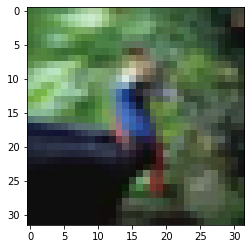

In [54]:
#Some tests:
img,label=cifar10[63]
plt.imshow(img)
print(class_names[label])

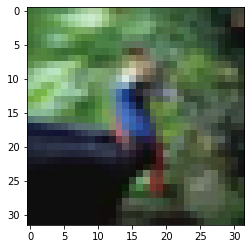

In [55]:
dir(transforms)
to_tensor=transforms.ToTensor()
tensor=to_tensor(img)
tensor.to(device='cuda')
tensor.shape,tensor.min(),tensor.max()
plt.imshow(tensor.permute(1,2,0))

In [56]:
imgs=torch.stack([to_tensor(img) for img,_ in cifar10],dim=3)

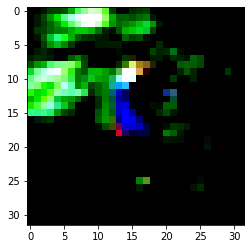

In [57]:
mean=imgs.view(3, -1).mean(dim=1)
std=imgs.view(3, -1).std(dim=1)
to_tensor_n=transforms.Normalize(mean,std)
plt.imshow(to_tensor_n(tensor).permute(1,2,0))

In [58]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
for img, label in cifar10
if label in [0, 2]]
cifar2_val = [(img, label_map[label])
for img, label in cifar10_val
if label in [0, 2]]

In [59]:
len(cifar2_val)

2000